# <center> Advanced Topics in Applied Mathematics <center>
# <center> Final Project <center>
# <center> Class-2   7-Sun Jian-2009853D-IM20-003      2021- Apr -20th <center> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [31]:
data1= pd.read_excel('C:\\Users\\sunjin\\Desktop\\ATAM.xlsx',header=None,skiprows=2);
data1.columns=['time','tempskin','tempout']
data1.info()
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5401 entries, 0 to 5400
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      5401 non-null   int64  
 1   tempskin  5401 non-null   float64
 2   tempout   5401 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 126.7 KB


,time,tempskin,tempout
0,0,37.0,37.000000
1,1,37.0,53.353708
2,2,37.0,55.448401
3,3,37.0,56.302632
4,4,37.0,56.832902


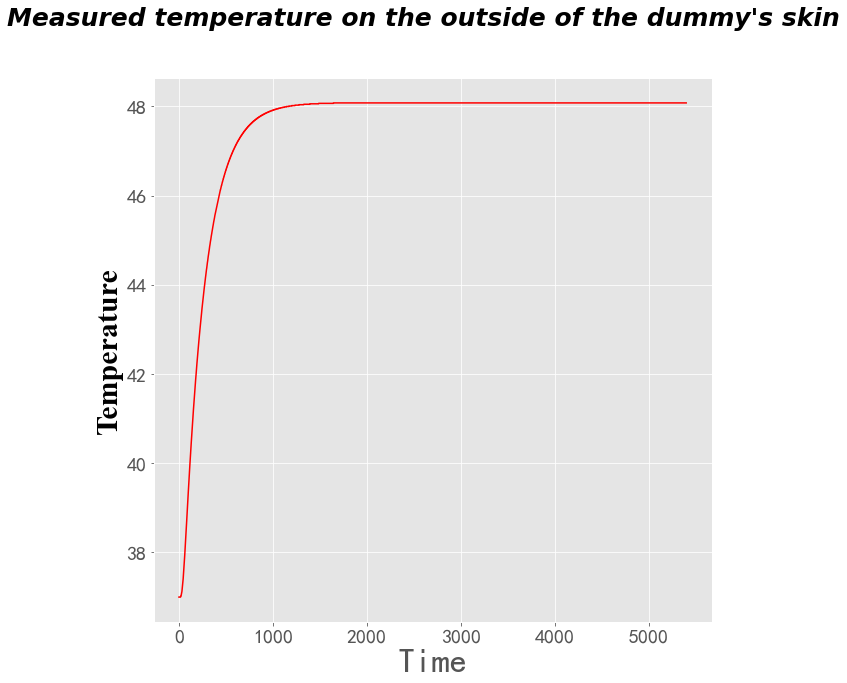

In [32]:
ti=list(data1['time'])
Te=list(data1['tempskin'])
Te2=list(data1['tempout'])
font = {'family':'Times New Roman','weight':'normal','size':30}
fig,ax=plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
plt.suptitle("Measured temperature on the outside of the dummy's skin",fontsize=25,fontstyle="italic",fontweight='black')
plt.xlabel('Time',axes=ax,fontsize=35,fontweight='black')
plt.ylabel('Temperature',font,color="k",fontweight='black')
plt.tick_params(labelsize=20)
plt.plot(ti,Te,c='r')

In [53]:
h =0.0001#Space step
N =153#Space Total Steps
dt =1#Time Step
M = 5400#Time Total Steps

U = np.zeros([N+1,M+1])##Create the two-dimensional empty array

#密度 rho，比热 cp，热传导率 k
rho1=1.18
rho2=74.2
rho3=862
rho4=300

c4=1377
c3=2100
c2=1726
c1=1005

lamda4=0.082
lamda3= 0.37
lamda2=0.045
lamda1=0.028

Ga = 8.5548
Gb = 115.6913
#Boundary conditions
for k in np.arange(0,M):
    U[152,k+1]= Te2[M]#((-Gb*h*(U[152,k]-75))/lamda4)+U[152,k]
    U[0,k+1]= Te[M]#((Ga*h*(Te[M]-37))/lamda1)+U[0,k]
    
#Initial conditions
for i in np.arange(0,N):
    U[i,0]=37
#((lamda1*i*h*dt)/(i*h**3*rho1*c1-lamda1*h*dt))*U[i+1,k]+((i*h**2*rho1*c1-dt*lamda1-2*i*dt*lamda1)/(i*h**2*rho1*c1-lamda1*dt))*U[i,k]+((i*lamda1*dt)/(i*h**2*rho1*c1-lamda1*dt))*U[i-1,k]

#((lamda2*i*h*dt)/(i*h**3*rho2*c2-lamda2*h*dt))*U[i+1,k]+((i*h**2*rho2*c2-dt*lamda2-2*i*dt*lamda2)/(i*h**2*rho2*c2-lamda2*dt))*U[i,k]+((i*lamda2*dt)/(i*h**2*rho2*c2-lamda2*dt))*U[i-1,k]

#((lamda3*i*h*dt)/(i*h**3*rho3*c3-lamda3*h*dt))*U[i+1,k]+((i*h**2*rho3*c3-dt*lamda3-2*i*dt*lamda3)/(i*h**2*rho3*c3-lamda3*dt))*U[i,k]+((i*lamda3*dt)/(i*h**2*rho3*c3-lamda3*dt))*U[i-1,k]

#((lamda4*i*h*dt)/(i*h**3*rho4*c4-lamda4*h*dt))*U[i+1,k]+((i*h**2*rho4*c4-dt*lamda4-2*i*dt*lamda4)/(i*h**2*rho4*c4-lamda4*dt))*U[i,k]+((i*lamda4*dt)/(i*h**2*rho4*c4-lamda4*dt))*U[i-1,k]  
#Recurrence relationship
for k in np.arange(0,M):
    for i in np.arange(1,N):
        if 0<=i<50:#第四层
            U[i,k+1]=((lamda1*i*h*dt)/(i*h**3*rho1*c1-lamda1*h*dt))*U[i+1,k]+((i*h**2*rho1*c1-dt*lamda1-2*i*dt*lamda1)/(i*h**2*rho1*c1-lamda1*dt))*U[i,k]+((i*lamda1*dt)/(i*h**2*rho1*c1-lamda1*dt))*U[i-1,k]
        elif 50<=i<86:#第三层
            U[i,k+1]=((lamda2*i*h*dt)/(i*h**3*rho2*c2-lamda2*h*dt))*U[i+1,k]+((i*h**2*rho2*c2-dt*lamda2-2*i*dt*lamda2)/(i*h**2*rho2*c2-lamda2*dt))*U[i,k]+((i*lamda2*dt)/(i*h**2*rho2*c2-lamda2*dt))*U[i-1,k]
        elif 86<=i<146:#第二层
            U[i,k+1]=((lamda3*i*h*dt)/(i*h**3*rho3*c3-lamda3*h*dt))*U[i+1,k]+((i*h**2*rho3*c3-dt*lamda3-2*i*dt*lamda3)/(i*h**2*rho3*c3-lamda3*dt))*U[i,k]+((i*lamda3*dt)/(i*h**2*rho3*c3-lamda3*dt))*U[i-1,k]
        else:#第一层
            U[i,k+1]=((lamda4*i*h*dt)/(i*h**3*rho4*c4-lamda4*h*dt))*U[i+1,k]+((i*h**2*rho4*c4-dt*lamda4-2*i*dt*lamda4)/(i*h**2*rho4*c4-lamda4*dt))*U[i,k]+((i*lamda4*dt)/(i*h**2*rho4*c4-lamda4*dt))*U[i-1,k]

<ipython-input-53-5921c3070c7b>:47: RuntimeWarning: overflow encountered in double_scalars
  U[i,k+1]=((lamda2*i*h*dt)/(i*h**3*rho2*c2-lamda2*h*dt))*U[i+1,k]+((i*h**2*rho2*c2-dt*lamda2-2*i*dt*lamda2)/(i*h**2*rho2*c2-lamda2*dt))*U[i,k]+((i*lamda2*dt)/(i*h**2*rho2*c2-lamda2*dt))*U[i-1,k]
<ipython-input-53-5921c3070c7b>:45: RuntimeWarning: overflow encountered in double_scalars
  U[i,k+1]=((lamda1*i*h*dt)/(i*h**3*rho1*c1-lamda1*h*dt))*U[i+1,k]+((i*h**2*rho1*c1-dt*lamda1-2*i*dt*lamda1)/(i*h**2*rho1*c1-lamda1*dt))*U[i,k]+((i*lamda1*dt)/(i*h**2*rho1*c1-lamda1*dt))*U[i-1,k]
<ipython-input-53-5921c3070c7b>:45: RuntimeWarning: invalid value encountered in double_scalars
  U[i,k+1]=((lamda1*i*h*dt)/(i*h**3*rho1*c1-lamda1*h*dt))*U[i+1,k]+((i*h**2*rho1*c1-dt*lamda1-2*i*dt*lamda1)/(i*h**2*rho1*c1-lamda1*dt))*U[i,k]+((i*lamda1*dt)/(i*h**2*rho1*c1-lamda1*dt))*U[i-1,k]
<ipython-input-53-5921c3070c7b>:47: RuntimeWarning: invalid value encountered in double_scalars
  U[i,k+1]=((lamda2*i*h*dt)/(i*h**3*rh